In [131]:
import pandas as pd
from scipy.stats import *

import numpy as np
from scipy import stats

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 데이터 불러오기 

In [459]:

busan_av=pd.read_csv('./data_영화_week/result_2021/2021_03~06부산.csv', thousands=',',encoding='UTF-8')
busan_bv = pd.read_csv("./data_영화_week/result_2021/2021_~02부산.csv", thousands=',', encoding='UTF-8')
busan_bv2 = pd.read_csv("./data_영화_week/result_2021/2021_03~06부산.csv", thousands=',', encoding='UTF-8')


In [460]:
busan_av=busan_av.drop(['Unnamed: 0'],axis=1)
busan_bv=busan_bv.drop(['Unnamed: 0'],axis=1)
busan_bv2=busan_bv2.drop(['Unnamed: 0'],axis=1)

In [461]:
# 백신전인 2021.01~2021.06 으로 합치기
busan_bv=pd.concat([busan_bv,busan_bv2]).reset_index(drop=True)

In [462]:
busan_bv
busan_av

,지역,매출액,관객수,주
0,부산시,133154520,15720,2021-01-01
1,부산시,90327570,10890,2021-01-08
2,부산시,139130900,16832,2021-01-15
3,부산시,381529810,45703,2021-01-22
4,부산시,467990770,52508,2021-01-29
5,부산시,553603860,60887,2021-02-05
6,부산시,571855100,62141,2021-02-12
7,부산시,460860670,52741,2021-02-19
8,부산시,539104860,59643,2021-02-26
9,부산시,513370590,56521,2021-03-05


,지역,매출액,관객수,주
0,부산시,513370590,56521,2021-03-12
1,부산시,513370590,56521,2021-03-12
2,부산시,438756130,48866,2021-03-19
3,부산시,425217210,46215,2021-03-26
4,부산시,522446130,60290,2021-04-02
5,부산시,395182360,43284,2021-04-09
6,부산시,314571750,35267,2021-04-16
7,부산시,390483590,42905,2021-04-23
8,부산시,445720640,51929,2021-04-30
9,부산시,656383270,73087,2021-05-07


## t검정
- 가설을 세운다 -> 두 집단의 평균은 같다(귀무가설) 두집단의 평균은 다르다(대립가설)
- 기준을 세운다 -> 검정통계량을 구한다(유의수준 5%)
- 결론을 내린다 -> p_value 참고

### p-value란?

- 귀무 가설이 참이라고 했을 때 표본 데이터가 수집될 확률
- P-value가 낮을 수록 대립가설 채택
- 통상적으로 p-value < 0.05 면 대립가설 채택
- 이때 0.05를 유의 수준이라고 하며 대게 0.05 또는 0.01 중 선택 

In [463]:
busan_av=busan_av.drop(0)

In [464]:
busan_bv
busan_av

,지역,매출액,관객수,주
0,부산시,133154520,15720,2021-01-01
1,부산시,90327570,10890,2021-01-08
2,부산시,139130900,16832,2021-01-15
3,부산시,381529810,45703,2021-01-22
4,부산시,467990770,52508,2021-01-29
5,부산시,553603860,60887,2021-02-05
6,부산시,571855100,62141,2021-02-12
7,부산시,460860670,52741,2021-02-19
8,부산시,539104860,59643,2021-02-26
9,부산시,513370590,56521,2021-03-05


,지역,매출액,관객수,주
1,부산시,513370590,56521,2021-03-12
2,부산시,438756130,48866,2021-03-19
3,부산시,425217210,46215,2021-03-26
4,부산시,522446130,60290,2021-04-02
5,부산시,395182360,43284,2021-04-09
6,부산시,314571750,35267,2021-04-16
7,부산시,390483590,42905,2021-04-23
8,부산시,445720640,51929,2021-04-30
9,부산시,656383270,73087,2021-05-07
10,부산시,321925980,35956,2021-05-14


In [465]:
busan_bv_total= (busan_bv['매출액'])
busan_av_total=(busan_av['매출액'])

In [466]:
busan_bv.describe()
busan_av.describe()

,매출액,관객수
count,2.700000e+01,27.000000
mean,4.942484e+08,54538.000000
std,1.974231e+08,20698.686629
min,9.032757e+07,10890.000000
25%,3.928330e+08,44493.500000
50%,5.133706e+08,56521.000000
75%,6.141192e+08,66795.500000
max,8.582801e+08,90495.000000


,매출액,관객수
count,1.600000e+01,16.000000
mean,5.612755e+08,61401.187500
std,1.816668e+08,18858.237879
min,3.145718e+08,35267.000000
25%,4.177085e+08,45482.250000
50%,5.179084e+08,58405.500000
75%,7.017426e+08,75624.250000
max,8.582801e+08,90495.000000


In [467]:
tmp = []
for i in range(11):
    tmp.append(np.random.randint(90327570,858280100,dtype='int64'))
    
# 결측치 처리 더 알아보기! ! ! ! ! !*********

In [468]:
#접종이후의 데이터가 접종 전보다 부족해서, 결측치를 평균값으로 대체
busan_av_total = np.append(busan_av_total,tmp )
busan_av_total

array([513370590, 438756130, 425217210, 522446130, 395182360, 314571750,
       390483590, 445720640, 656383270, 321925980, 691293590, 814105630,
       733089700, 780069950, 679511920, 858280140, 596754846, 369040555,
       303829076, 165646828, 246855365, 566258051, 629234095, 847300290,
       323383837, 543391078, 372932312], dtype=int64)

In [469]:
np.array(busan_bv_total)
busan_av_total

array([133154520,  90327570, 139130900, 381529810, 467990770, 553603860,
       571855100, 460860670, 539104860, 513370590, 513370590, 513370590,
       438756130, 425217210, 522446130, 395182360, 314571750, 390483590,
       445720640, 656383270, 321925980, 691293590, 814105630, 733089700,
       780069950, 679511920, 858280140], dtype=int64)

array([513370590, 438756130, 425217210, 522446130, 395182360, 314571750,
       390483590, 445720640, 656383270, 321925980, 691293590, 814105630,
       733089700, 780069950, 679511920, 858280140, 596754846, 369040555,
       303829076, 165646828, 246855365, 566258051, 629234095, 847300290,
       323383837, 543391078, 372932312], dtype=int64)

In [470]:
from scipy.stats import shapiro

# 귀무가설 : 데이터는 정규분포이다
# 대립가설 : 데이터는 정규분포가 아니다

shapiro(busan_av_total-busan_bv_total)

# pvalue가 0.05보다 크므로 귀무가설 채택

ShapiroResult(statistic=0.9482874870300293, pvalue=0.19476771354675293)

In [471]:
# kstest도 해보깅 
# 정규성 검정 : 두 값의 차이가 정규분포를 따르는지 확인
kstest(busan_av_total-busan_bv_total, 'norm')

# pvalue가 거의 0에 가까운 수치(지수가 -면 소수 이하로 내려간다)
# pvalue가 0에 가까우므로 귀무가설은 기각
# 엥,, ? ? ?

KstestResult(statistic=0.5185185185185185, pvalue=2.8243594855644654e-07)

In [472]:
# 결론!
# 귀무가설 : 대응 표본 두 집단의 평균은 같다 - 백신의 효과는 없다
# 대립가설 : 대응 표본 두 집단의 평균은 다르다 - 백신의 효과가 있다
# pvalue가 0에 가까우면 귀무가설은 기각
# 통계량은 확실한 백신의 효과가 있다 - 백신의 효과가 있다

ttest_rel(busan_av_total, busan_bv_total)
# 즉, pvalue가 유의수준이하이므로 귀무가설이 기각됨. 판매액의 변화가 있다
# 통계량을 확인했을 때 접종에 따른 판매액은 증가했다는 것을 알 수 있음

Ttest_relResult(statistic=0.4222724060704177, pvalue=0.6762977769620723)

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x205916abd30>,
 'caps': [<matplotlib.lines.Line2D at 0x205916b9430>,
 'boxes': [<matplotlib.lines.Line2D at 0x205916ab9d0>,
 'medians': [<matplotlib.lines.Line2D at 0x205916b9af0>,
 'fliers': [<matplotlib.lines.Line2D at 0x205916b9e50>,
 'means': []}

([<matplotlib.axis.XTick at 0x205916953d0>,
 [Text(1, 0, '백신접종이전'), Text(2, 0, '백신접종이후')])

<function matplotlib.pyplot.show(close=None, block=None)>

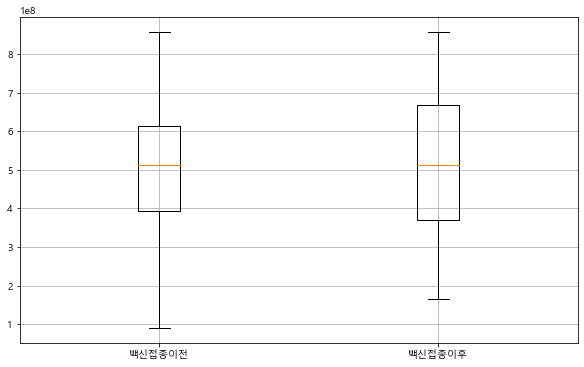

In [473]:
# 상자 그래프로 확인
plt.figure(figsize=(10,6))
plt.boxplot((busan_bv_total,busan_av_total))
plt.xticks([1,2],['백신접종이전','백신접종이후'])  # [1,2]는 나누기정도

plt.grid()
plt.show

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, '주')

Text(0, 0.5, '매출액')

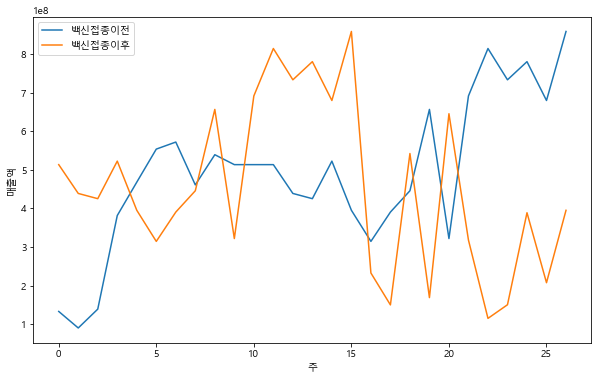

In [365]:
plt.figure(figsize=(10,6))
plt.plot(busan_bv_total,label='백신접종이전')
plt.plot(busan_av_total,label='백신접종이후')
plt.xlabel('주')
plt.ylabel('매출액')
plt.legend()
plt.show()

## 상관분석(19일에!!!)
- 두 변수 모두 연속형 변수 일때 사용하는 상관계수로 x와 y에 대한 상관 계수는 다음과 같이 정의 됨

    - 상관계수가 1에 가까울 수록 양의 상관관계가 강하다고 함

    - 상관계수가 -1에 가까울수록 음의 상관관계가 강하다고 함

    - 상관계수가 0에 가까울수록 상관관계가 약하다고 함

In [478]:
busan_bv

,지역,매출액,관객수,주
0,부산시,133154520,15720,2021-01-01
1,부산시,90327570,10890,2021-01-08
2,부산시,139130900,16832,2021-01-15
3,부산시,381529810,45703,2021-01-22
4,부산시,467990770,52508,2021-01-29
5,부산시,553603860,60887,2021-02-05
6,부산시,571855100,62141,2021-02-12
7,부산시,460860670,52741,2021-02-19
8,부산시,539104860,59643,2021-02-26
9,부산시,513370590,56521,2021-03-05


In [476]:
# 산점도그래프
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 6)

([<matplotlib.axis.XTick at 0x205928456d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

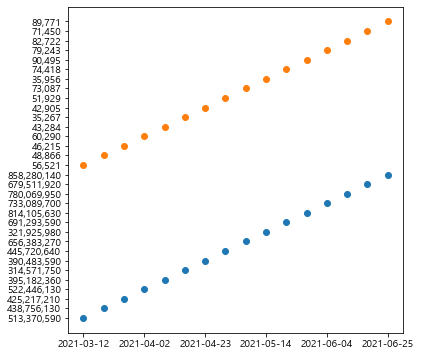

In [484]:
plt.scatter(busan_av['주'],busan['매출액'])
plt.scatter(busan_av['주'],busan['관객수'])
plt.xticks(busan_av['주'].iloc[::3])
# 관객수나 매출액 모두 상승세임을 확인

<Figure size 720x432 with 0 Axes>

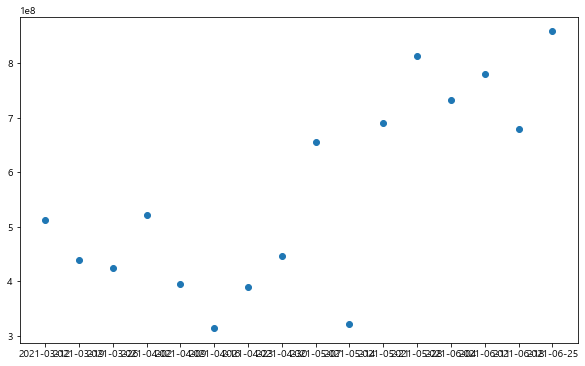

In [497]:
plt.figure(figsize=(10,6))
plt.scatter(busan_av['주'],busan_av['매출액'])

#### 스피어만 상관 계수


- 분석하고자 하는 두 연속형 분포가 심각하게 정규분포를 벗어난다거나 순위척도 자료일 때 사용
    - 연속형 자료일 때는 각 측정값을 순위 척도 자료로 변환시켜 계산
    
    
    
- 두 변수 순위 사이의 단조 관련성(한 변수가 증가할 때 다른 변수가 증가하는지 감소하는지에 대한 관계)만을 측정하는 상관계수
- 선형적인 상관 관계를 나타내지 않는다

# 누적접종자에따른 매출액 시각화